<a href="https://colab.research.google.com/github/JanKotynia/SalesDataAnalysis/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import kagglehub
import pandas as pd
import numpy as np
import os

path = kagglehub.dataset_download("ikramshah512/amazon-products-sales-dataset-42k-items-2025")

print(os.listdir(path))
file_path = os.path.join(path, "amazon_products_sales_data_uncleaned.csv")
file_path2 = os.path.join(path, "amazon_products_sales_data_cleaned.csv")

Using Colab cache for faster access to the 'amazon-products-sales-dataset-42k-items-2025' dataset.
['amazon_products_sales_data_cleaned.csv', 'amazon_products_sales_data_uncleaned.csv']


In [158]:
df = pd.read_csv(file_path, encoding="utf-8")
df2 = pd.read_csv(file_path2, encoding="utf-8")

In [159]:
df.head(5)

,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
0,"BOYA BOYALINK 2 Wireless Lavalier Microphone for iPhone Camera Android, Mini Lapel Micophone Wireless, 48 KHz 24 Bit, 6mm Mic, 1000ft, 30h Use, Noise Cancelling, Clip on Mic USB-C/Lightning/3.5mm TRS",4.6 out of 5 stars,375,300+ bought in past month,89.68,basic variant price: 2.4GHz,$159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,"Delivery Mon, Sep 1",Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3L._AC_UL320_.jpg,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxNDQ2OjE3NTU4MDAwNjg6c3BfYXRmX2Jyb3dzZTozMDA2NzE0NTMwMTcyMDI6OjA6Og&url=%2FBOYA-BOYALINK-Microphone-Micophone-Cancelling%2Fdp%2FB0DNZB7TQG%2Fref%3Dsr_1_1_sspa%3Fdib%3DeyJ2IjoiMSJ9.avmZlHCQuVOwikquBqYSIjN8SVcyxtkXHQMPt7Zjzkf4TeZzrZfQETMhdWuWgtTrVz8ITKpXLHvZj0fZRjxqgMPYNMitRqeUoeIwdYfc5nnzJ8m0T8HYeedlh3YSOhJQjeHskevMUQWyg6TtoB2tHcHt-edYPsQ6VwFQTI6avsPrgVpFKrto3ff9TDR9BcRyPwM6AiYn-vh7wA5PP9DjZddhCPf7bVPcHMZ6Hwd40dQDWm9_M8R-LcwKY8wnuWRUSplhfYJBvTjAgsb3Y3y88VGpfqY3V8Rd2ge-woBzUMA.yqwi-krmElGgXIMa8kKUPx1XmaXd9lHaAkMkVVpStxo%26dib_tag%3Dse%26qid%3D1755800068%26refinements%3Dp_n_g-101014971069111%253A119653281011%26s%3Delectronics%26sr%3D1-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfYnJvd3Nl%26psc%3D1,2025-08-21 11:14:29
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Charging Cable 6.6FT, Chubby USB A/C to C/Lightning with Light for iPhone 16e 15 14 Pro/MacBook Air 17/iPad/Samsung/Switch 2, Multi Chargers for All Devices",4.3 out of 5 stars,"2,457",6K+ bought in past month,9.99,basic variant price: nan,$15.99,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Fri, Aug 29",NaN,https://m.media-amazon.com/images/I/61nbF6aVIPL._AC_UL320_.jpg,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxNDQ2OjE3NTU4MDAwNjg6c3BfYXRmX2Jyb3dzZTozMDA4NjA2Mzc2NDIxMDI6OjA6Og&url=%2FLISEN-Charging-Lighting-MacBook-Chargers%2Fdp%2FB0DHWZCZDZ%2Fref%3Dsr_1_2_sspa%3Fdib%3DeyJ2IjoiMSJ9.avmZlHCQuVOwikquBqYSIjN8SVcyxtkXHQMPt7Zjzkf4TeZzrZfQETMhdWuWgtTrVz8ITKpXLHvZj0fZRjxqgMPYNMitRqeUoeIwdYfc5nnzJ8m0T8HYeedlh3YSOhJQjeHskevMUQWyg6TtoB2tHcHt-edYPsQ6VwFQTI6avsPrgVpFKrto3ff9TDR9BcRyPwM6AiYn-vh7wA5PP9DjZddhCPf7bVPcHMZ6Hwd40dQDWm9_M8R-LcwKY8wnuWRUSplhfYJBvTjAgsb3Y3y88VGpfqY3V8Rd2ge-woBzUMA.yqwi-krmElGgXIMa8kKUPx1XmaXd9lHaAkMkVVpStxo%26dib_tag%3Dse%26qid%3D1755800068%26refinements%3Dp_n_g-101014971069111%253A119653281011%26s%3Delectronics%26sr%3D1-2-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfYnJvd3Nl%26psc%3D1,2025-08-21 11:14:29
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wireless Lavalier Microphone, Intelligent Noise Cancelling, 32-bit Float Internal Recording, 820 ft.(250m) Range, Microphone for iPhone, Android, Camera",4.6 out of 5 stars,"3,044",2K+ bought in past month,314.00,basic variant price: nan,$349.00,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/61h78MEXojL._AC_UL320_.jpg,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxNDQ2OjE3NTU4MDAwNjg6c3BfYXRmX2Jyb3dzZTozMDA4Nzk0NzAxMTk3MDI6OjA6Og&url=%2FDJI-Microphone-Intelligent-Cancelling-Recording%2Fdp%2FB0CFZX734J%2Fref%3Dsr_1_3_sspa%3Fdib%3DeyJ2IjoiMSJ9.avmZlHCQuVOwikquBqYSIjN8SVcyxtkXHQMPt7Zjzkf4TeZzrZfQETMhdWuWgtTrVz8ITKpXLHvZj0fZRjxqgMPYNMitRqeUoeIwdYfc5nnzJ8m0T8HYeedlh3YSOhJQjeHskevMUQWyg6TtoB2tHcHt-edYPsQ6VwFQTI6avsPrgVpFKrto3ff9TDR9BcRyPwM6AiYn-vh7wA5PP9DjZddhCPf7bVPcHMZ6Hwd40dQDWm9_M8R-LcwKY8wnuWRUSplhfYJBvTjAgsb3Y3y88VGpfqY3V8Rd2ge-woBzUMA.yqwi-krmElGgXIMa8kKUPx1XmaXd9lHaAkMkVVpStxo%26dib_tag%3Dse%26qid%3D1755800068%26refinements%3Dp_n_g-101014971069111%253A119653281011%26s%3Delectronics%26sr%3D1-3-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfYnJvd3Nl%26psc%3D1,2025-08-21 11:14:29
3,"Apple AirPods Pro 2 Wireless Earbuds, Active Noise Cancellation, Hearing Aid Feature, Bluetooth Headphones, Transparency, Personalized Spatial Audio, High-Fidelity Sound, 

## Preparing the dataset

In [160]:
df.isnull().sum()

,0
title,0
rating,1024
number_of_reviews,1024
bought_in_last_month,3217
current/discounted_price,11749
price_on_variant,0
listed_price,0
is_best_seller,0
is_sponsored,0
is_couponed,0


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     42675 non-null  object
 1   rating                    41651 non-null  object
 2   number_of_reviews         41651 non-null  object
 3   bought_in_last_month      39458 non-null  object
 4   current/discounted_price  30926 non-null  object
 5   price_on_variant          42675 non-null  object
 6   listed_price              42675 non-null  object
 7   is_best_seller            42675 non-null  object
 8   is_sponsored              42675 non-null  object
 9   is_couponed               42675 non-null  object
 10  buy_box_availability      28022 non-null  object
 11  delivery_details          30955 non-null  object
 12  sustainability_badges     3408 non-null   object
 13  image_url                 42675 non-null  object
 14  product_url           

In [162]:
df.shape

(42675, 16)

In [163]:
df = df.rename(columns={'current/discounted_price': 'discounted_price'})

removing unnecessary columns

In [164]:
df.drop(['price_on_variant','buy_box_availability',	'sustainability_badges', 'image_url',	'product_url', 'collected_at'], axis=1,inplace=True)

identification and removing rows without prices

In [165]:
df.drop(df[(df['listed_price'] == 'No Discount') & (df['discounted_price'].isna())].index, inplace=True)

setting 'No Discount' rows to 'current/discounted_price'

In [166]:
df.loc[df['listed_price'] == 'No Discount', 'listed_price'] = df.loc[df['listed_price'] == 'No Discount', 'discounted_price']

processing numeric columns, assigning them to other columns, and changing data types

In [167]:
df['listed_price'] = df['listed_price'].str.replace(r'^[^\d]+', '', regex=True)

df.loc[df['discounted_price'].isna(), 'discounted_price'] = df.loc[df['discounted_price'].isna(),'listed_price']

In [168]:
df['discounted_price'] = df['discounted_price'].str.replace(r',', '', regex=True)
df['number_of_reviews'] = df['number_of_reviews'].str.replace(r',', '', regex=True)
df['listed_price'] = df['listed_price'].str.replace(r',', '', regex=True)

df['listed_price'] = df['listed_price'].astype(float)
df['discounted_price'] = df['discounted_price'].astype(float)
df['number_of_reviews'] = df['number_of_reviews'].astype(float)

filling null values

In [169]:
df.loc[df['number_of_reviews'].isna(), 'number_of_reviews'] = 0
df.loc[df['bought_in_last_month'].isna(), 'bought_in_last_month'] = 0
df.loc[df['bought_in_last_month'] == '', 'bought_in_last_month'] = 0
df.loc[df['rating'].isna(), 'rating'] = 0
df.loc[df['delivery_details'].isna(), 'delivery_details'] = 'No data'

In [170]:
df['bought_in_last_month'] = df['bought_in_last_month'].str.replace(r'[^0-9K]+$', '', regex=True)

a lot of strange values

In [171]:
df['bought_in_last_month'].value_counts().tail(10)

,count
bought_in_last_month,
ESRB Rating: Everyone 10,1
($54.26$54.26,1
($828.56$828.56,1
($46.81$46.81,1
"($1,080.00$1,080.00",1
($433.33$433.33,1
"($1,315.78$1,315.78",1
"($4,813.00$4,813.00/100",1
($5.27$5.27,1


drop rows with strange values

In [172]:
df = df[df['bought_in_last_month'].astype(str).str.match(r'^[0-9K]+$')]

final adjustments and column type modification

In [173]:
mask = df['bought_in_last_month'].str[-1] == 'K'
df.loc[mask, 'bought_in_last_month'] = df.loc[mask, 'bought_in_last_month'].apply(lambda x: np.double(str(x)[:-1]) * 1000)

In [174]:
df['bought_in_last_month'] = df['bought_in_last_month'].astype(float)

In [175]:
df.isna().sum()

,0
title,0
rating,0
number_of_reviews,0
bought_in_last_month,0
discounted_price,0
listed_price,0
is_best_seller,0
is_sponsored,0
is_couponed,0
delivery_details,0


changing rating datatype

In [176]:
df['rating'] = df['rating'].apply(lambda x : str(x).split(' ')[0])
df['rating'] = df['rating'].astype(float)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25237 entries, 0 to 42674
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 25237 non-null  object 
 1   rating                25237 non-null  float64
 2   number_of_reviews     25237 non-null  float64
 3   bought_in_last_month  25237 non-null  float64
 4   discounted_price      25237 non-null  float64
 5   listed_price          25237 non-null  float64
 6   is_best_seller        25237 non-null  object 
 7   is_sponsored          25237 non-null  object 
 8   is_couponed           25237 non-null  object 
 9   delivery_details      25237 non-null  object 
dtypes: float64(5), object(5)
memory usage: 2.1+ MB


In [178]:
df['delivery_details'].value_counts().head(50)

,count
delivery_details,
"Delivery Mon, Sep 1",5023
"Delivery Thu, Sep 4",3920
"Delivery Thu, Sep 11",2894
"Delivery Tue, Sep 2",2607
"Delivery Wed, Sep 3",1649
"Delivery Tue, Sep 9",1011
"FREE delivery Thu, Sep 4Or fastest delivery Tomorrow, Aug 31",930
"FREE delivery Wed, Sep 3Or fastest delivery Sun, Aug 31",896
"FREE delivery Wed, Sep 3 on $35 of items shipped by AmazonOr fastest delivery Sun, Aug 31",768


Cutting out the paid delivery date and setting NaN for fields without a specified delivery date

In [179]:
df['delivery_details'] = df['delivery_details'].astype(str).str.extract(r'([A-Z][a-z]{2}(?:[-\s]*\d+)*)$')
df.loc[df['delivery_details'].isna(), 'delivery_details'] = "No data"


In [180]:
df['delivery_details'].head(50)

,delivery_details
0,Sep 1
1,Aug 29
2,Sep 1
10,Aug 29
12,Sep 1
13,Sep 1
14,Aug 29
16,Sep 1 - 11
17,Aug 29
18,Aug 29


new column with date format data

In [181]:
df['delivery_date'] = pd.to_datetime(
    df['delivery_details'] + ' 2025',
    format='%b %d %Y',
    errors='coerce'
)

In [182]:
df.loc[df['delivery_date'].isna(),'delivery_date'] = pd.to_datetime(
    df.loc[mask, 'delivery_details']
      .str.extract(r'([A-Z][a-z]{2}\s*\d{1,2})')[0]
      .add(' 2025'),
    format='%b %d %Y',
    errors='coerce'
)

In [183]:
mask = df['delivery_details'] == "No data"
df.loc[mask,'delivery_date'] = np.nan

In [184]:
df.drop(columns='delivery_details', inplace=True)

changing sponsored column type

In [185]:
df['is_sponsored'].value_counts()

,count
is_sponsored,
Organic,21636
Sponsored,3601


In [186]:
df['is_sponsored'] = np.where(df['is_sponsored'] == 'Organic', False, True)

changing is_couponed column type

In [187]:
df['is_couponed'].value_counts()

,count
is_couponed,
No Coupon,24116
Save 15% with coupon,398
Save 10% with coupon,193
Save 5% with coupon,190
Save $100.00 with coupon,96
Save $25.00 with coupon,65
Save $30.00 with coupon,48
Save $69.00 with coupon,31
Save 8% with coupon,18


Set "No Coupon" to 0 and extract only the numeric value from the coupon.

In [188]:
df.loc[df['is_couponed'] == 'No Coupon','is_couponed'] = 'No'
df['is_couponed'] = np.where(df['is_couponed'] == 'No Coupon', float(0.0), df['is_couponed'].str.split().str[1])

drop duplicates

In [189]:
df.drop_duplicates(inplace=True)

In [190]:
df['last_month_revenue'] = df['bought_in_last_month'] * df['listed_price']

**Final column types:**

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6577 entries, 0 to 42228
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   title                 6577 non-null   object        
 1   rating                6577 non-null   float64       
 2   number_of_reviews     6577 non-null   float64       
 3   bought_in_last_month  6577 non-null   float64       
 4   discounted_price      6577 non-null   float64       
 5   listed_price          6577 non-null   float64       
 6   is_best_seller        6577 non-null   object        
 7   is_sponsored          6577 non-null   bool          
 8   is_couponed           221 non-null    object        
 9   delivery_date         6208 non-null   datetime64[ns]
 10  last_month_revenue    6577 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(6), object(3)
memory usage: 571.6+ KB


### Dataset Analysis

In [192]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

As we can see, the rating level is correlated with the number of orders for a given product. Products with a record number of copies sold have no less than 4.5 stars.

In [193]:
#plotly html chart
fig = px.scatter(
    df,
    y='bought_in_last_month',
    x='rating',
    title='Correlation: number of copies sold and rating'
)

fig.show()

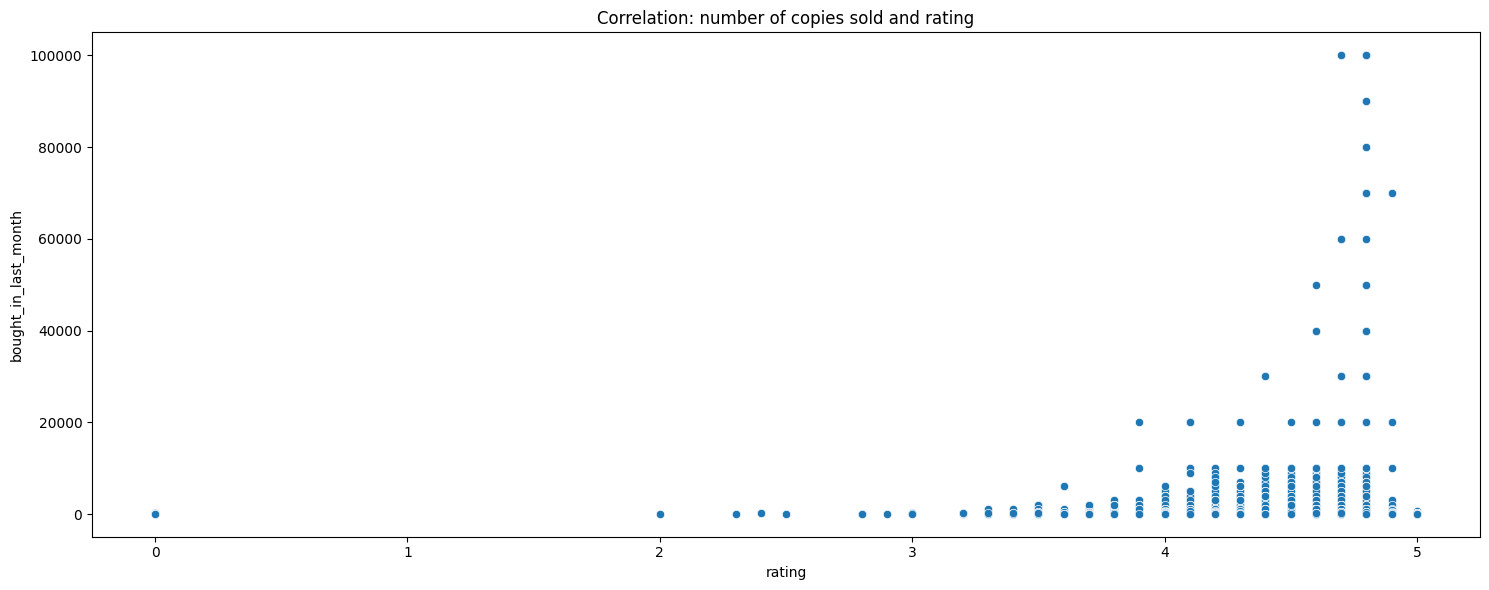

In [194]:
plt.figure(figsize=(15, 6))
sns.scatterplot(
    data=df,
    x="rating",
    y="bought_in_last_month"
)

plt.title("Correlation: number of copies sold and rating")
plt.xlabel("rating")
plt.ylabel("bought_in_last_month")
plt.tight_layout()
plt.show()

I decided to apply a logarithmic function to better illustrate the distribution of the data on the chart. However, we can see that the discount value is not correlated with the number of copies sold.

In [195]:
df['discount_amount'] = df['listed_price'] - df['discounted_price']


In [196]:
df["discount_amount_log"] = np.log(df["discount_amount"] + 1)

In [197]:
#plotly html chart
fig = px.scatter(
    df,
    y='bought_in_last_month',
    x='discount_amount_log',
    title='Correlation: number of copies sold and discount amount'
)

fig.show()

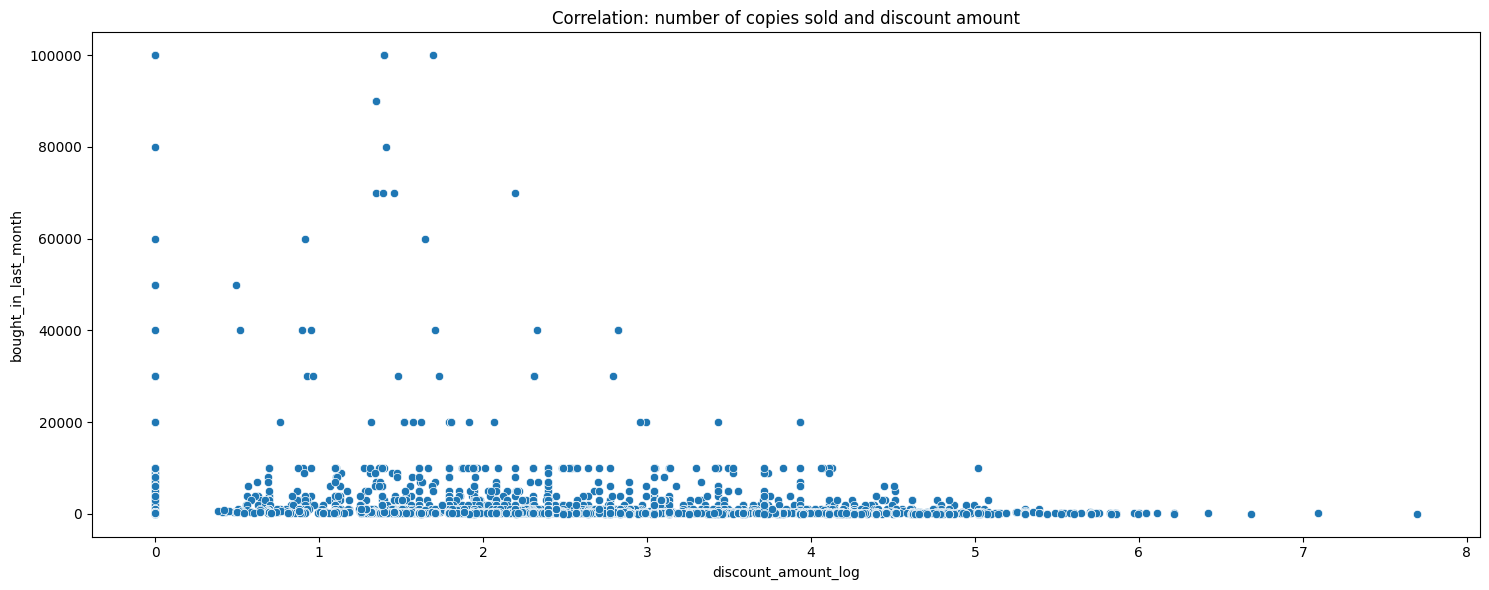

In [198]:
plt.figure(figsize=(15, 6))
sns.scatterplot(
    data=df,
    x="discount_amount_log",
    y="bought_in_last_month"
)

plt.title("Correlation: number of copies sold and discount amount")
plt.xlabel("discount_amount_log")
plt.ylabel("bought_in_last_month")
plt.tight_layout()
plt.show()


To better assess the relationships, I used a correlation matrix.
It confirms no correlation between the discount and number of sold copies.

Shows that the link between product ratings and number of sold copies is weaker than I initially assumed.

We can also see that sponsorship affects sales, but not in a very significant way.

In [199]:
#plotly html matrix
corr = df[['bought_in_last_month','discount_amount','rating','is_sponsored']].corr()

fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    title="Correlation matrix for the number of copies sold, product rating, discount amount, and sponsorship",
    aspect="auto"
)

fig.show()

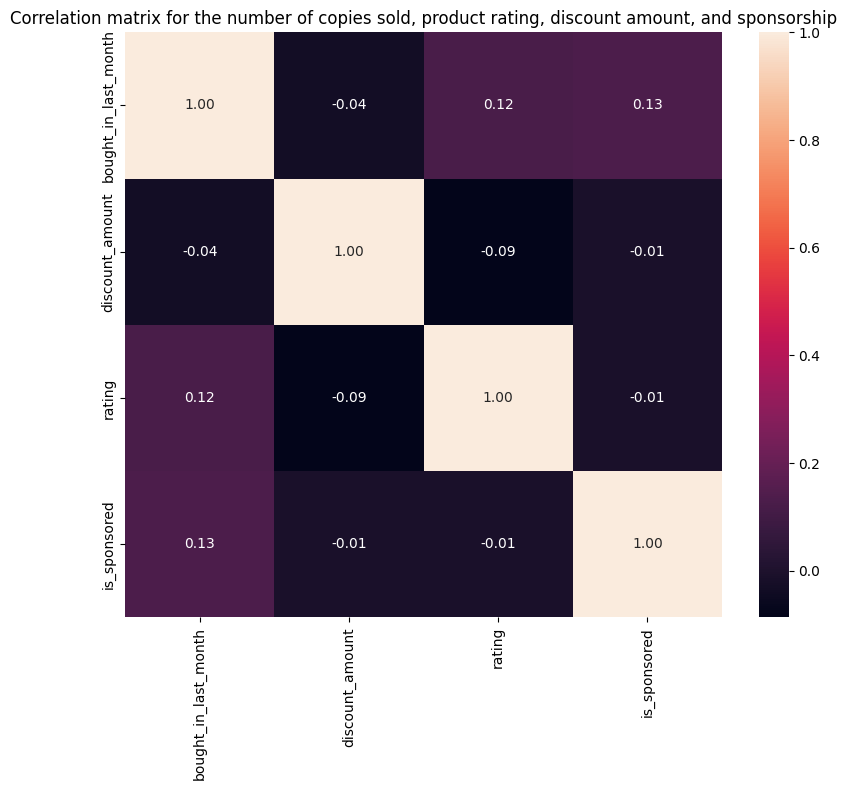

In [200]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt=".2f")

plt.title("Correlation matrix for the number of copies sold, product rating, discount amount, and sponsorship")
plt.tight_layout()
plt.show()

In [201]:
df.drop(columns='discount_amount_log', inplace=True)

Top 10 products with the highest number of good ratings

In [202]:
df_best = df.sort_values(['number_of_reviews', 'rating'], ascending=False).head(10)
df_best.index = range(1, 11)
pd.set_option('display.max_colwidth', None)
df_best.iloc[:,list(range(0, 4)) + [5]]

,title,rating,number_of_reviews,bought_in_last_month,listed_price
1,"Amazon Basics 48-Pack AA Alkaline High-Performance Batteries, 1.5 Volt, 10-Year Shelf Life",4.7,865598.0,100000.0,14.99
2,[Older Version] SanDisk 32GB 2-Pack Ultra MicroSDHC UHS-I Memory Card (2x32GB) - SDSQUAR-032G-GN6MT,4.7,645416.0,400.0,15.99
3,"Amazon Basics AAA Alkaline High-Performance Batteries, 1.5 Volt, 10-Year Shelf Life, 36 Count (Pack of 1)",4.7,625776.0,100000.0,14.49
4,"Amazon Basics HDMI Cable, 3ft, 4K@60Hz, High-Speed 4K HDMI 2.0 Cord (18Gbps), 2160p, 48 bit, Compatible with TV/PS5/Xbox/Roku, Black",4.7,553927.0,10000.0,5.99
5,"SanDisk 1TB Extreme microSDXC UHS-I Memory Card with Adapter - Up to 160MB/s, C10, U3, V30, 4K, A2, Micro SD - SDSQXA1-1T00-GN6MA",4.8,353306.0,500.0,89.35
6,"[Older Version] SanDisk 128GB Ultra microSDXC UHS-I Memory Card with Adapter - 120MB/s, C10, U1, Full HD, A1, Micro SD Card - SDSQUA4-128G-GN6MA",4.7,315834.0,1000.0,14.35
7,SanDisk Cruzer Blade 8GB USB 2.0 Flash Drive- SDCZ50-008G-B35,4.6,298061.0,500.0,7.77
8,"Seagate Portable 2TB External Hard Drive HDD — USB 3.0 for PC, Mac, PlayStation, & Xbox -1-Year Rescue Service (STGX2000400)",4.6,262557.0,10000.0,79.99
9,"Amazon Basics Dog and Puppy Pee Pads with 5-Layer Leak-Proof Design and Quick-Dry Surface for Potty Training, Standard Absorbency, X-Large, 28 x 34 Inch - Pack of 60, Blue & White",4.5,237579.0,20000.0,26.99
10,"Amazon Basics 8-Pack 9V Alkaline Batteries, 5-Year Shelf Life - for Smoke/CO Detector, Electronics & Audio",4.7,231583.0,60000.0,12.69


As we can see, there is no significant correlation between the number of products sold and whether the product is sponsored or not.

In [203]:
sponsored, not_sponsored = round(df.groupby('is_sponsored')['bought_in_last_month'].mean())

print(f"Average number of copies sold with sponsorship:  {sponsored}\nAverage number of copies sold without sponsorship:  {not_sponsored}")

Average number of copies sold with sponsorship:  1264.0
Average number of copies sold without sponsorship:  4176.0


In [208]:
corr = df[['bought_in_last_month','is_sponsored']].astype(int).corr()
#plotly html matrix
fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    title="Correlation matrix for the number of copies sold and sponsorship",
    aspect="auto"
)

fig.show()

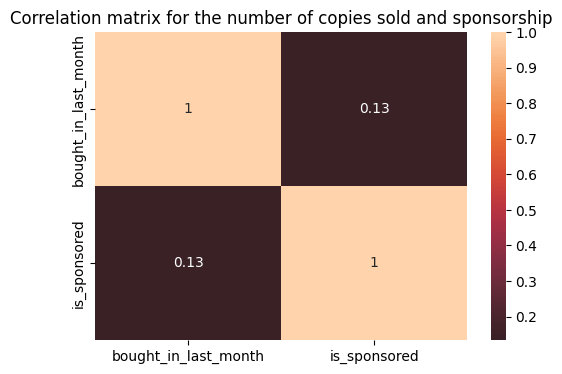

In [205]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, center=0)
plt.title("Correlation matrix for the number of copies sold and sponsorship")
plt.show()

Top 10 products with the lowest revenue

In [206]:
biggest_rev = df.sort_values(by='last_month_revenue', ascending=False).tail(10)
biggest_rev.index = range(10, 0,-1)
biggest_rev.iloc[:,[0,5,-2]].sort_index()

,title,listed_price,last_month_revenue
1,Buffalo Games - Gold - Eric Dowdle - Golden Gate Bridge - 500 Piece Jigsaw Puzzle for Adults - Challenging Puzzle Perfect for Game Nights,12.00,600.0
2,"LISEN 54W Car Phone Charger USB C, Cigarette Lighter Adapter, Car Accessories for iPhone, USB C Car Charger Adapter USBC Type C 12v, Fit for iPhone 16, 15, 14, 13 Samsung Google iPad Android, Orange",14.99,749.5
3,LISEN for iPhone 16 Car Charger Fast Charging [80W+18W GaN] [Mini Metal] USBC Car Charger iPhone [PD80W QC 3.0] USB C Car Charger for iPhone 16 Pro Max MacBook Air iPad2024 Samsung Galaxy S24 S23,16.89,844.5
4,LISEN for iPhone 16 Car Charger Fast Charging [80W+18W GaN] [Mini Metal] USBC Car Charger iPhone [PD80W QC 3.0] USB C Car Charger for iPhone 16 Pro Max MacBook Air iPad2024 Samsung Galaxy S24 S23,16.89,844.5
5,"Transformers Over The Ear Earbuds Wireless Bluetooth 5.4 LED Power Display Earbuds with Earhooks 65H Playtimes Deep Bass IPX5 Waterproof Ear Buds for Sports/Workout, TF-T26 Optimus Prime",19.99,999.5
6,"Transformers Over The Ear Earbuds Wireless Bluetooth 5.4 LED Power Display Earbuds with Earhooks 65H Playtimes Deep Bass IPX5 Waterproof Ear Buds for Sports/Workout, TF-T26 Optimus Prime",19.99,999.5
7,Logitech Wired Mouse M90 Black USB,12.99,1299.0
8,Logitech Wired Mouse M90 Black USB,12.99,1299.0
9,Logitech Wired Mouse M90 Black USB,12.99,1299.0
10,"UBeesize Magnetic Car Phone Holder, 360° Adjustable Magsafe Vacuum Suction Mount with Dual Lock, Dashboard & Windshield Compatible, Fits iPhone 16/15/14/13/12 & Other Smartphones, Sticky Pad Included",26.66,1333.0
